# Load the dataset

In [1]:
!pip install tensorflow_datasets

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import Model

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
# Get the full dataset (batch_size=-1) in NumPy arrays from the returned tf.Tensor object
cifar10_train = tfds.load(name="cifar10", split=tfds.Split.TRAIN, batch_size=-1 )
cifar10_test = tfds.load(name="cifar10", split=tfds.Split.TEST, batch_size=-1)

# Convert tfds dataset to numpy array records
cifar10_train = tfds.as_numpy(cifar10_train)
cifar10_test = tfds.as_numpy(cifar10_test)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.1DHE31_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.1DHE31_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


# Process, normalize, and resize the images

In [4]:
# Seperate feature X and label Y
X_train, Y_train = cifar10_train["image"], cifar10_train["label"]
X_test, Y_test = cifar10_test["image"], cifar10_test["label"]
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=99, test_size=0.2)

# Normalize the image data
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Specify the input image size and number of classes
img_width, img_height = 32, 32
nb_classes = 10

# Converts a class vector (integers) to binary class matrix to have one-hot encoding label. For example:
Y_train = keras.utils.to_categorical(Y_train, nb_classes)
Y_val = keras.utils.to_categorical(Y_val, nb_classes)
Y_test = keras.utils.to_categorical(Y_test, nb_classes)

# Implement a CNN architecture selected from the models available in the TensorFlow Keras

## DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

dense_net_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

dense_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dense_net_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=64)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 54ms/step - accuracy: 0.5131 - loss: 1.4162 - val_accuracy: 0.6162 - val_loss: 1.0871
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - accuracy: 0.6468 - loss: 0.9990 - val_accuracy: 0.6315 - val_loss: 1.0420
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6851 - loss: 0.8904 - val_accuracy: 0.6435 - val_loss: 1.0307
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7183 - loss: 0.7870 - val_accuracy: 0.6403 - val_loss: 1.0311
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7528 - loss: 0.7015 - val_accuracy: 0.6475 - val_loss: 1.0645
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7875 - loss: 0.6010 - val_accuracy: 0.6477 - val_loss: 1.0853
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8240 - loss: 0.5056 - val_accuracy: 0.6489 - val_loss: 1.0928
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8566 - loss: 0.4138 - va

In [ ]:
dense_net_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_6          │ (None, 38, 38, 3)      │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,408 │ zero_padding2d_6[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 8, 8, 64)       │              0 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 8, 8, 64)       │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 128)      │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 128)      │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 128)      │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 32)       │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 8, 8, 96)       │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 10,217,056 (38.97 MB)

 Trainable params: 1,059,850 (4.04 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 2,119,702 (8.09 MB)

## EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

efficient_net_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

efficient_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
efficient_net_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=64)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.0994 - loss: 2.3409 - val_accuracy: 0.1022 - val_loss: 2.3028
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.0975 - val_loss: 2.3030
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1012 - loss: 2.3025 - val_accuracy: 0.0966 - val_loss: 2.3029
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.0966 - val_loss: 2.3030
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3029
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.0956 - val_loss: 2.3030
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0956 - val_loss: 2.3029
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/

In [ ]:
efficient_net_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 32, 32, 3)      │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 32, 32, 3)      │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 32, 32, 3)      │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 33, 33, 3)      │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 16, 16, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 16, 16, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 16, 16, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 16, 16, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 16, 16, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 16, 16, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 8,015,555 (30.58 MB)

 Trainable params: 1,321,994 (5.04 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 2,643,990 (10.09 MB)

## ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

res_net_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

res_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
res_net_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=64)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.1988 - loss: 2.3691 - val_accuracy: 0.2992 - val_loss: 1.9202
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.2938 - loss: 1.9301 - val_accuracy: 0.3051 - val_loss: 1.8664
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3278 - loss: 1.8588 - val_accuracy: 0.2974 - val_loss: 1.8623
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3366 - loss: 1.8283 - val_accuracy: 0.3669 - val_loss: 1.7614
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3504 - loss: 1.7978 - val_accuracy: 0.3370 - val_loss: 1.8151
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3558 - loss: 1.7776 - val_accuracy: 0.3650 - val_loss: 1.7493
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3647 - loss: 1.7623 - val_accuracy: 0.3803 - val_loss: 1.7199
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s

In [ ]:
res_net_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 29,912,992 (114.11 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,216,854 (16.09 MB)

# Train and evaluate the CNN for the image classification task

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = dense_net_model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6428 - loss: 1.3160
Test accuracy: 0.6370000243186951


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = efficient_net_model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0993 - loss: 2.3027
Test accuracy: 0.10000000149011612


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = res_net_model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4082 - loss: 1.6616
Test accuracy: 0.4043999910354614


For VGG, Inception, Xception, NASNet, ConvNeXt, they are too large, complex, or designed for high-resolution images, which is excessive for CIFAR-10's needs. Then, potential models would be DenseNet, EfficientNet and ResNet:
*  The DenseNet model shows reasonable performance with an accuracy of 63.7%. However, given that the test loss is relatively high at 1.3160, it suggests the model might be overfitting.
*  The EfficientNet model is underperforming, with an accuracy of only 10%, which is equivalent to random guessing (for a 10-class problem like CIFAR-10). The high loss of 2.3027 indicates that the model is not learning useful patterns and is struggling to generalize.
*  The ResNet model performs better than EfficientNet but lags behind DenseNet. The test accuracy of 40.4% and loss of 1.6616 indicate that the model is underfitting, meaning it is not learning enough from the training data.

=> ResNet or DenseNet would be easily fine tuned than the others. But the case for underfitting would be easier to tackle than overfitting.

# Modify the model by introducing enhancements such as skip connections or adjusting hyperparameters of the layers to improve its performance

In [5]:
from tensorflow.keras.applications import ResNet50

model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print("Training set shape: " + str(X_train.shape))
print("validation set shape: " + str(X_val.shape))
print("Test set shape: " + str(X_test.shape))

Training set shape: (40000, 32, 32, 3)
validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [7]:
model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## First train

In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

l2_factor = 0.001

inputs = layers.Input(shape=(32, 32, 3))
x = model_resnet(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(l2_factor))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(nb_classes, activation='softmax', kernel_regularizer=l2(l2_factor))(x)

model_resnet_cifar10 = models.Model(inputs, outputs)

In [9]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

# Define the initial learning rate, decay rate, and decay steps
initial_learning_rate = 0.01
decay_rate = 0.96  # The learning rate is multiplied by this factor
decay_steps = 10000  # Decay after this number of steps

# Apply exponential decay
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True  # If True, learning rate decreases at discrete intervals
)

# Use the learning rate schedule in your optimizer
optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)

# Compile the model
model_resnet_cifar10.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model, show training and validation performance
model_training = model_resnet_cifar10.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.1712 - loss: 3.9735 - val_accuracy: 0.1015 - val_loss: 4.0152
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.3192 - loss: 2.7958 - val_accuracy: 0.4692 - val_loss: 2.3357
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.5068 - loss: 2.1957 - val_accuracy: 0.5552 - val_loss: 1.9283
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6246 - loss: 1.7231 - val_accuracy: 0.5957 - val_loss: 1.7204
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.6961 - loss: 1.3963 - val_accuracy: 0.5540 - val_loss: 1.7937
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.7318 - loss: 1.1862 - val_accuracy: 0.6655 - val_loss: 1.3455
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.7590 - loss: 1.0393 - val_accuracy: 0.7008 - val_loss: 1.1841
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.7754 - loss: 0.9058 - 

In [14]:
# Evaluate the model prediction on a data sample
pred = model_resnet_cifar10.predict(X_test[:1]) # Make prediction on a data sample
print("Model prediction: " + str(pred)) # Model prediction
print("True label: " + str(Y_test[:1])) # True label

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Model prediction: [[3.6454618e-05 1.1284986e-05 2.1020901e-04 1.5189381e-04 8.0643012e-04
  1.3963646e-03 2.9521145e-05 9.9726379e-01 5.6013837e-06 8.8422959e-05]]
True label: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [15]:
# Evaluate the model prediction on the entire test set
preds = model_resnet_cifar10.predict(X_test) # Make prediction on the entire test set
preds_index = np.argmax(preds, axis=1) # Get the index of maximum class probability of each of the data sample
label_index = np.argmax(Y_test, axis=1) # Get the index of maximum class label

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step


In [16]:
# Compare the predictions with the true labels
comparison_result = np.equal(preds_index, label_index) # Return the comparison result which is an array of True/False.

# Calculate the number of correct predictions (True values in the comparison result array).
correct_preds = comparison_result.sum() # Compute the sum of elements across dimensions of a tensor.

# Show accuracy
print("Number of correct predictions: " + str(correct_preds))
print("Test accuracy: " + str(correct_preds/X_test.shape[0]))

Number of correct predictions: 7298
Test accuracy: 0.7298


In [17]:
# Evaluate the model accuracy using the function model.evaluate()
model_eval = model_resnet_cifar10.evaluate(X_test, Y_test, batch_size=4096)
print("List of metrics" + str(model_resnet_cifar10.metrics_names)) # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().

print("Test loss: " + str(model_eval[0])) # Test loss
print("Test accuracy: " + str(model_eval[1])) # Test accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7320 - loss: 1.1422
List of metrics['loss', 'compile_metrics']
Test loss: 1.1474661827087402
Test accuracy: 0.7297999858856201


## Second train

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy


# Define data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True  # randomly flip images
)


# Define the model architecture and compilation
for layer in model_resnet.layers[-30:]:
    layer.trainable = True  # Unfreeze last 30 layers

# Create an instance of CategoricalCrossentropy with label smoothing
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

model_resnet_cifar10.compile(optimizer=optimizer,
                             loss=loss_fn,  # Use the instance of the loss function
                             metrics=['accuracy'])

# Train the model with warmup callback
model_training = model_resnet_cifar10.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Use data augmentation here
    epochs=20,
    validation_data=(X_val, Y_val)
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.7770 - loss: 1.1080 - val_accuracy: 0.7423 - val_loss: 1.1407
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8140 - loss: 0.9631 - val_accuracy: 0.7677 - val_loss: 1.0590
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8262 - loss: 0.9327 - val_accuracy: 0.8020 - val_loss: 1.0008
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.8345 - loss: 0.9099 - val_accuracy: 0.7747 - val_loss: 1.0561
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8460 - loss: 0.8895 - val_accuracy: 0.8036 - val_loss: 0.9746
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8516 - loss: 0.8657 - val_accuracy: 0.7512 - val_loss: 1.1388
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.8570 - loss: 0.8570 - val_accuracy: 0.8102 - val_loss: 0.9660
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.8626 - loss: 0.8412 - val_accurac

In [23]:
# Print model summary. See the changes in the model structure and the number of trainable parameters.
model_resnet_cifar10.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,339,157 (195.84 MB)

 Trainable params: 25,643,018 (97.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 25,643,019 (97.82 MB)

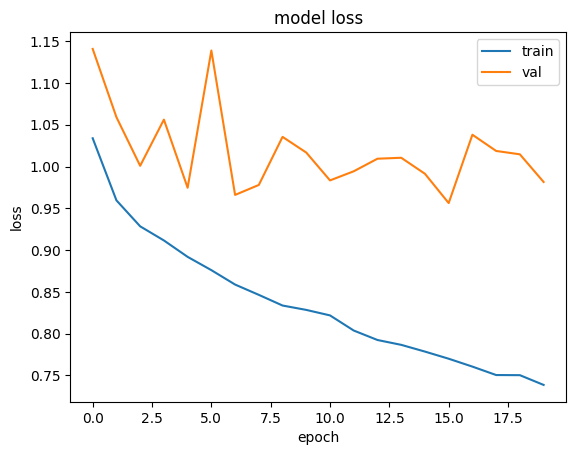

In [24]:
# Visualize the training and validation loss over epochs
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

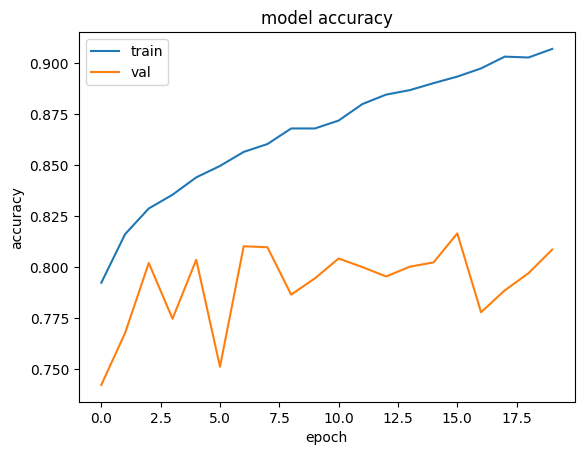

In [25]:
# Visualize the training and validation accuracy over epochs
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
# Evaluate the model prediction on a data sample
pred = model_resnet_cifar10.predict(X_test[:1]) # Make prediction on a data sample
print("Model prediction: " + str(pred)) # Model prediction
print("True label: " + str(Y_test[:1])) # True label

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Model prediction: [[0.01926166 0.01181255 0.02682259 0.02850559 0.02006061 0.02622776
  0.01519392 0.82588613 0.01327319 0.0129561 ]]
True label: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [28]:
# Evaluate the model prediction on the entire test set
preds = model_resnet_cifar10.predict(X_test) # Make prediction on the entire test set
preds_index = np.argmax(preds, axis=1) # Get the index of maximum class probability of each of the data sample
label_index = np.argmax(Y_test, axis=1) # Get the index of maximum class label

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


In [29]:
# Compare the predictions with the true labels
comparison_result = np.equal(preds_index, label_index) # Return the comparison result which is an array of True/False.

# Calculate the number of correct predictions (True values in the comparison result array).
correct_preds = comparison_result.sum() # Compute the sum of elements across dimensions of a tensor.

# Show accuracy
print("Number of correct predictions: " + str(correct_preds))
print("Test accuracy: " + str(correct_preds/X_test.shape[0]))

Number of correct predictions: 8052
Test accuracy: 0.8052


# Offer comments and observations regarding the impact of these modifications on the model’s effectiveness

* L2 Regularization and Dropout (Impact: 40.4% → 72.9%)
* Exponential Decay with Learning Rate Scheduling (Impact: Sustained 72.9%)
* Data Augmentation and Layer Unfreezing (Impact: 72.9% → 80.5%)
* Label Smoothing (Impact: Enhanced 80.5% Stability)

=> The modifications transformed ResNet’s CIFAR-10 accuracy from 40% to 80%. These enhancements progressively increased model effectiveness through regularization, dynamic learning rate adaptation, targeted fine-tuning, and robust data augmentation.
